# Domain Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data=pd.read_csv("Customer Purchasing Behaviors.csv")
data.head(5)

In [5]:
data=data.drop(["user_id"],axis=1)

In [9]:
data.head(5)

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [22]:
data.tail()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
233,234,40,60000,450,7.2,West,20
234,235,38,59000,430,6.9,North,20
235,236,54,74000,630,9.4,South,27
236,237,32,52000,360,5.8,West,18
237,238,31,51000,340,5.6,North,17


In [24]:
data.isnull()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
233,False,False,False,False,False,False,False
234,False,False,False,False,False,False,False
235,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False


In [ ]:
data.describe()

In [5]:
data.isnull()

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
233,False,False,False,False,False,False
234,False,False,False,False,False,False
235,False,False,False,False,False,False
236,False,False,False,False,False,False


In [13]:
data.shape

(238, 7)

# EDA

In [18]:
from skimpy import skim

In [20]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 238    │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ user_id               │   0 │     0 │  119.5 │  68.85 │      1 │  60.25 │  119.5 │  178.8 │   238 │ ▇▇▇▇▇▇ │  │
│ │ age                   │   0 │     0 │  38.68 │  9.351 │     22 │     31 │     39 │  46.75 │    55 │ ▆▇▇▇▆▇ │  │
│ │ annual_income         │   0 │     0 │  57410 │  11400 │  30000 │  50000 │  59000 │  66750 │ 75000 │ ▂▂▆▇▇▇ │  │
│ │ purchase_amount       │   0 │     0 │  425.6 │  140.1 │    150 │    320 │    440 │  527.5 │   640 │ ▅▅▅▇▇▇ │  │
│ │ loyalty_score         │   0 │     0 │  6.794 │  1.899 │      3 │    5.5 │      7 │  8.275 │   9.5 │ ▃▅▅▆▆▇ │  │
│ │ purchase_frequency    │   0 │     0 │   19.8 │  4.563 │     10 │     17 │     20 │     23 │    28 │ ▃▅▆▇▆▆ │  │
│ └───────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ region                    │       0 │          0 │                            1 │                      238 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [14]:
data.median(axis=0,numeric_only=True)

age                      39.0
annual_income         59000.0
purchase_amount         440.0
loyalty_score             7.0
purchase_frequency       20.0
dtype: float64

# Change type of column "region" to category

In [15]:
data['region'] = data['region'].astype('category')

In [16]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 238    │ │ int32       │ 4     │ │ region                │                                │
│ │ Number of columns │ 6      │ │ float64     │ 1     │ └───────────────────────┘                                │
│ └───────────────────┴────────┘ │ category    │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ age                   │   0 │     0 │  38.68 │  9.351 │     22 │     31 │     39 │  46.75 │    55 │ ▆▇▇▇▆▇ │  │
│ │ annual_income         │   0 │     0 │  57410 │  11400 │  30000 │  50000 │  59000 │  66750 │ 75000 │ ▂▂▆▇▇▇ │  │
│ │ purchase_amount       │   0 │     0 │  425.6 │  140.1 │    150 │    320 │    440 │  527.5 │   640 │ ▅▅▅▇▇▇ │  │
│ │ loyalty_score         │   0 │     0 │  6.794 │  1.899 │      3 │    5.5 │      7 │  8.275 │   9.5 │ ▃▅▅▆▆▇ │  │
│ │ purchase_frequency    │   0 │     0 │   19.8 │  4.563 │     10 │     17 │     20 │     23 │    28 │ ▃▅▆▇▆▆ │  │
│ └───────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ region                           │         0 │              0 │ False                 │                  4 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Visulizations

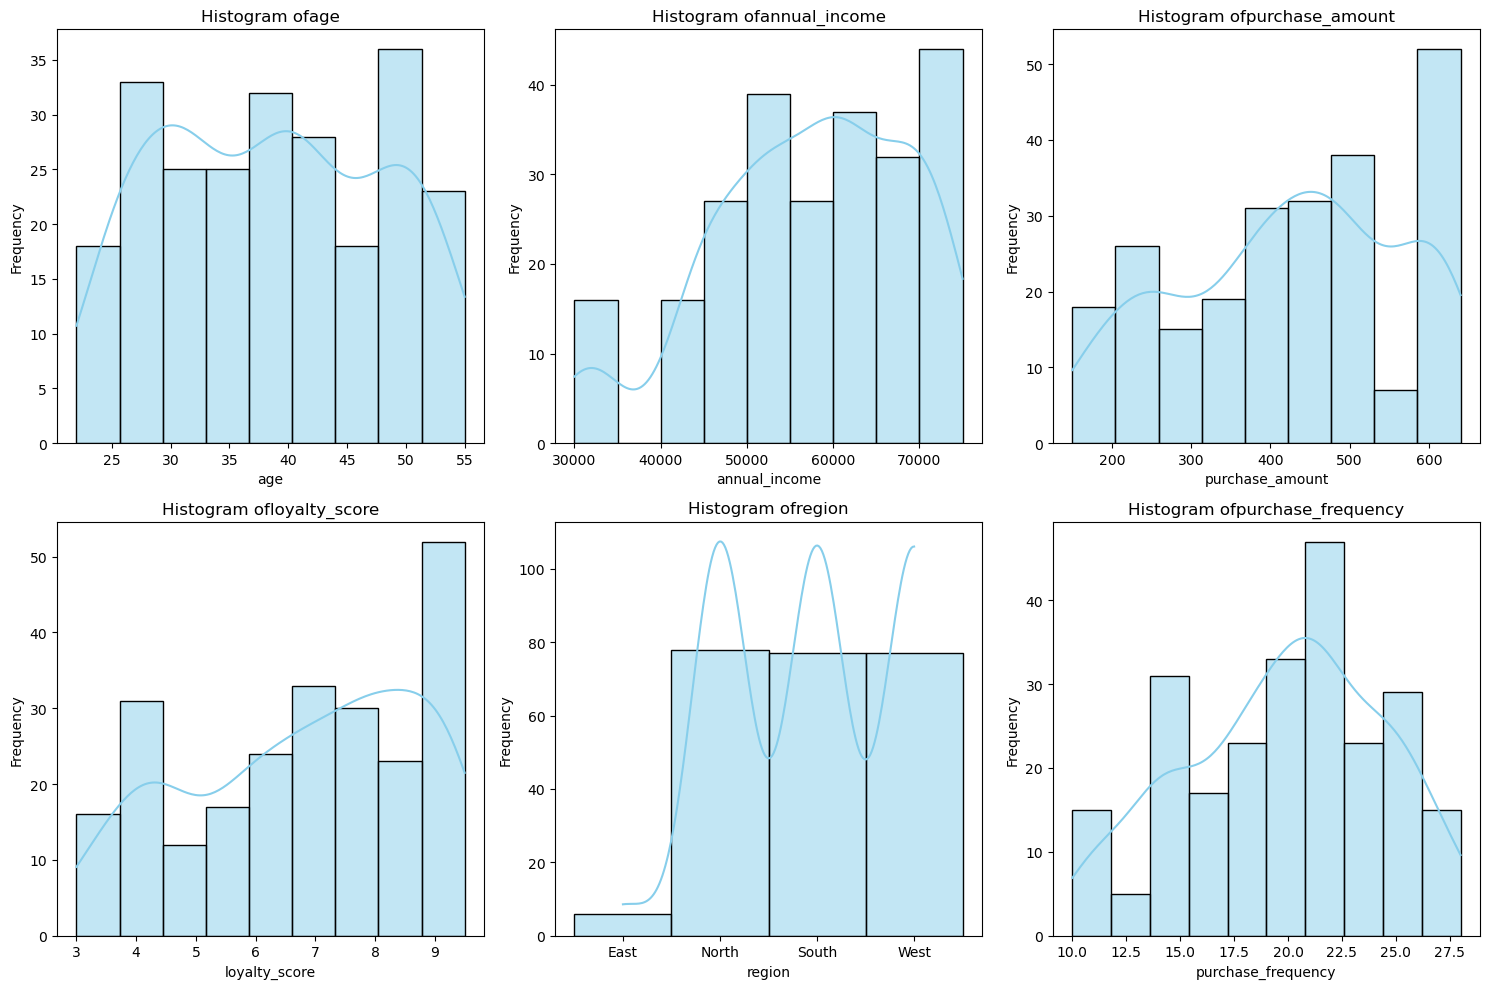

In [18]:
fig,axes=plt.subplots(2,3,figsize=(15,10))
for i,col in enumerate(data.columns):
    row=i //3 
    col_pos=i%3
    sns.histplot(data[col],kde=True,color='skyblue',edgecolor='black',ax=axes[row,col_pos])
    axes[row,col_pos].set_title(f'Histogram of{col}')
    axes[row,col_pos].set_xlabel(col)
    axes[row,col_pos].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Region and Others

In [ ]:
for i in data.columns:
    if i != 'region' and i != 'num_region':
        plt.figure(figsize=(8,8))
        sns.violinplot(x = i,y='region', data=data,orient='h',fill=False,inner_kws=dict(box_width=15, whis_width=2, color=".8"))
        plt.grid()
        plt.title(f'Region - {i}')
        plt.show()
        print(data[i].groupby(data['region'],observed=True).agg(['mean','count','median','max','min','sum']))

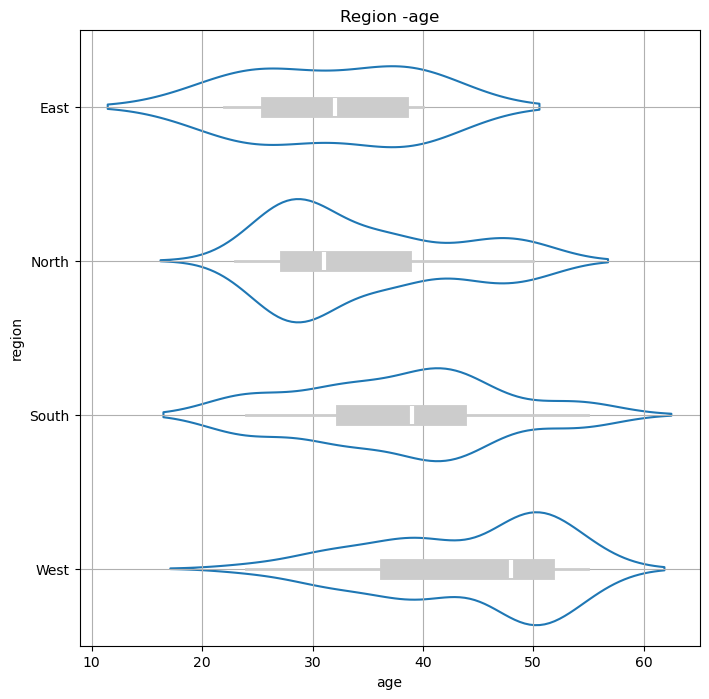

             mean  count  median  max  min   sum
region                                          
North   34.358974     78    31.0   50   23  2680
South   38.000000     77    39.0   55   24  2926
West    44.272727     77    48.0   55   24  3409
East    31.666667      6    32.0   40   22   190


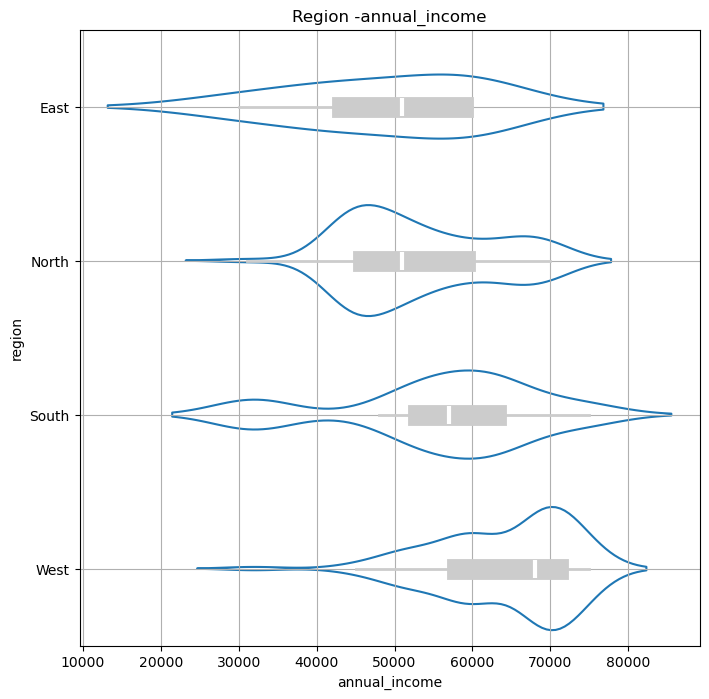

                mean  count   median    max    min      sum
region                                                     
North   53038.461538     78  51000.0  70000  31000  4137000
South   55766.233766     77  57000.0  75000  32000  4294000
West    64129.870130     77  68000.0  75000  32000  4938000
East    49000.000000      6  51000.0  60000  30000   294000


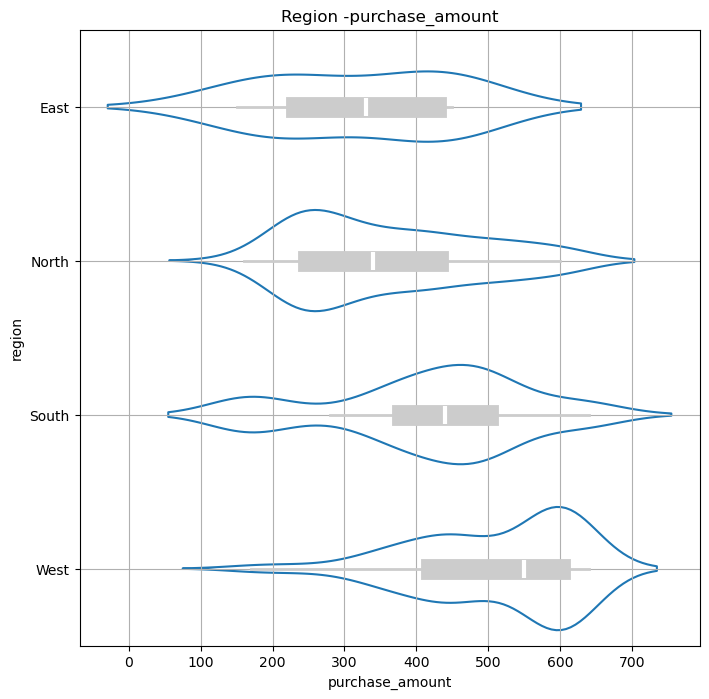

              mean  count  median  max  min    sum
region                                            
North   358.589744     78   340.0  600  160  27970
South   416.883117     77   440.0  640  170  32100
West    510.519481     77   550.0  640  170  39310
East    320.000000      6   330.0  450  150   1920


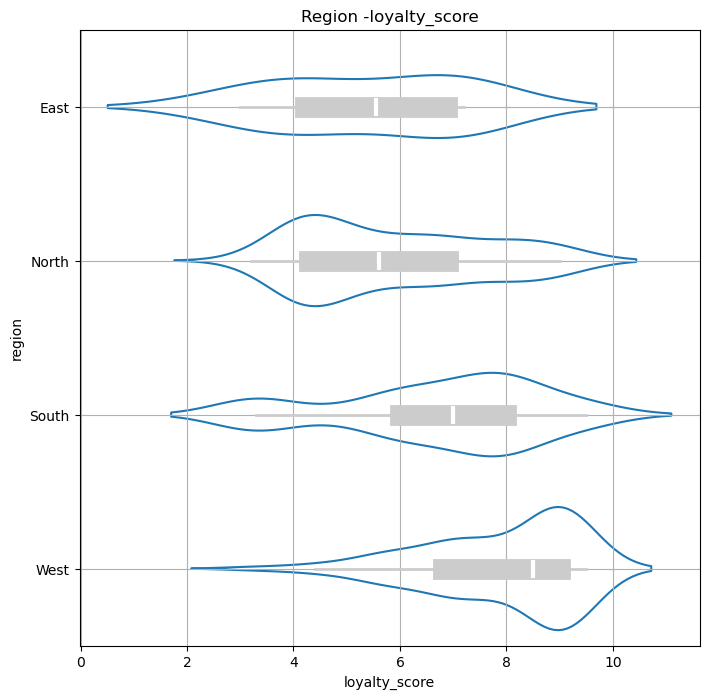

            mean  count  median  max  min    sum
region                                          
North   5.865385     78    5.60  9.0  3.2  457.5
South   6.725974     77    7.00  9.5  3.3  517.9
West    7.911688     77    8.50  9.5  3.3  609.2
East    5.400000      6    5.55  7.2  3.0   32.4


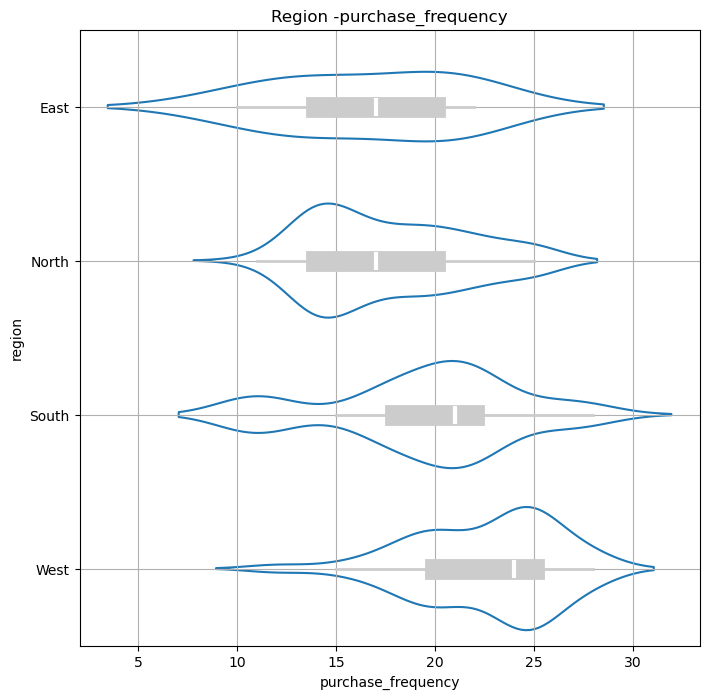

             mean  count  median  max  min   sum
region                                          
North   17.653846     78    17.0   25   11  1377
South   19.467532     77    21.0   28   11  1499
West    22.545455     77    24.0   28   12  1736
East    16.666667      6    17.0   22   10   100


In [20]:
for i in data.columns:
    if i !='region' and i !='num_region':
        plt.figure(figsize=(8,8))
        sns.violinplot(x=i,y='region',data=data,orient='h',fill=False,inner_kws=dict(box_width=15,whis_width=2,color=".8"))
        plt.grid()
        plt.title(f'Region -{i}')
        plt.show()
        print(data[i].groupby(data['region'],observed=True).agg(['mean','count','median','max','min','sum']))

# Correlation

In [21]:
data['num_region'] = data['region'].astype('category').cat.codes

In [22]:
data.head()

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency,num_region
0,25,45000,200,4.5,North,12,1
1,34,55000,350,7.0,South,18,2
2,45,65000,500,8.0,West,22,3
3,22,30000,150,3.0,East,10,0
4,29,47000,220,4.8,North,13,1


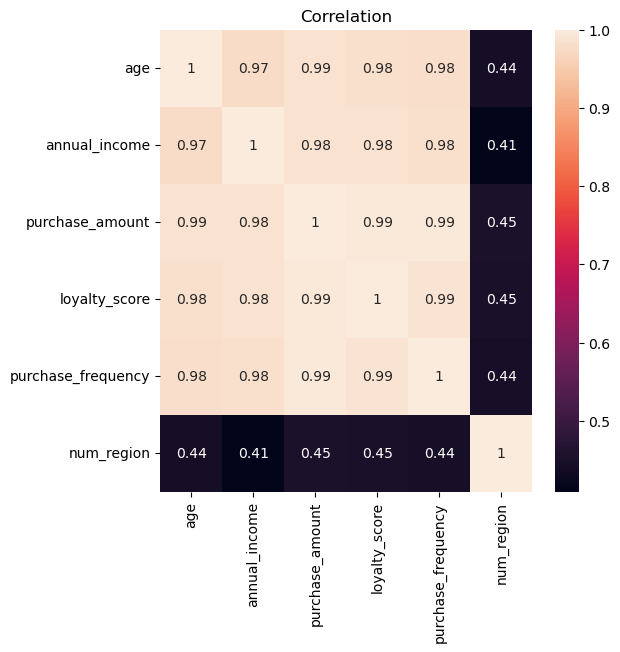

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.title('Correlation')
plt.show()

In [26]:
data1 = data.drop('region',axis=1)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(data1)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

             Variable         VIF
0               const  274.362040
1                 age   37.172639
2       annual_income   41.140162
3     purchase_amount  198.371952
4       loyalty_score   97.526005
5  purchase_frequency   85.389545
6          num_region    1.333763


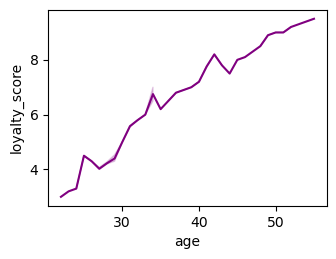

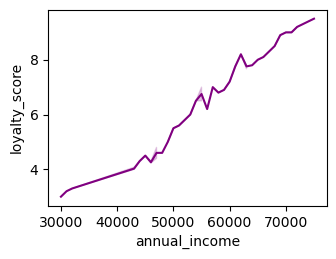

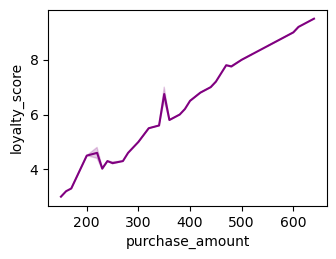

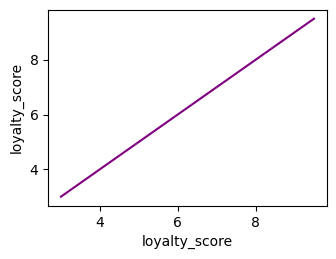

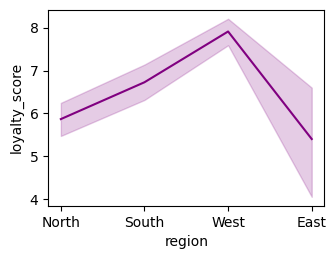

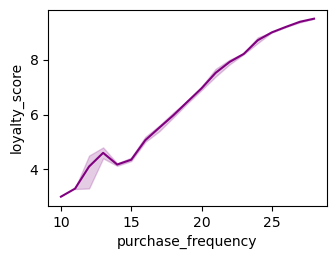

In [5]:
for column in data.columns:
    plt.subplot(2,2,2)
    sns.lineplot(x=column,y="loyalty_score",data=data,color="purple")
    plt.tight_layout()
    plt.show()

<Axes: xlabel='region', ylabel='loyalty_score'>

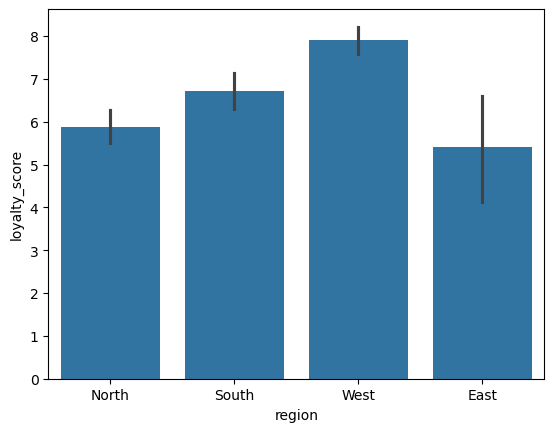

In [6]:
sns.barplot(x="region",y="loyalty_score",data=data)

In [7]:
le=LabelEncoder()

In [9]:
data["region"]=le.fit_transform(data["region"])

In [10]:
data.head(5)

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,25,45000,200,4.5,1,12
1,34,55000,350,7.0,2,18
2,45,65000,500,8.0,3,22
3,22,30000,150,3.0,0,10
4,29,47000,220,4.8,1,13


# Linear Regression

In [11]:
lr=LinearRegression()

In [12]:
x=data.drop(["loyalty_score"],axis=1)
y=data["loyalty_score"]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred=lr.predict(x_test)

In [16]:
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

In [17]:
print("R2 Score :",r2*100)
print("Mean Sqaured Error :",mse*100)

R2 Score : 99.1098466593405
Mean Sqaured Error : 3.6792850206748557


# Model : Random Forest Regression

In [18]:
rfr=RandomForestRegressor(n_estimators=10, random_state=42)

In [20]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [21]:
y_predi=rfr.predict(x_test)

In [22]:
r22=r2_score(y_test,y_predi)
mse1=mean_squared_error(y_test,y_predi)

In [23]:
print("R2 Score :",r22*100)
print("Mean Squared Error :",mse1*100)

R2 Score : 99.944152991234
Mean Squared Error : 0.23083333333333345


### Project Designed and Developed by: AYUSH | PAYAL  